# Taller de Machine Learning con R

## Bloque 2: Selección de Datos

Primero descargaremos la base de datos de una libería de R

In [3]:
#install.packages('datasets')
library(datasets)
data(iris)

En este caso nuestra $y$ será dada por la variable $Species$

In [4]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [5]:
dim(iris)

[1] 150   5

### ¿Se podrá aprender a encontrar algún patrón con los datos ordenados así?

Procederemos a barajar la información (aleatorizar). Paraesto se establecerá la semilla aleatoria de las funciones de aleatorización para tener resultados similares.

In [6]:
set.seed(150)

In [7]:
#Proceso de aleatorización
iris<-iris[sample(1:nrow(iris)),]
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
8,5.0,3.4,1.5,0.2,setosa
67,5.6,3.0,4.5,1.5,versicolor
71,5.9,3.2,4.8,1.8,versicolor
125,6.7,3.3,5.7,2.1,virginica
36,5.0,3.2,1.2,0.2,setosa
55,6.5,2.8,4.6,1.5,versicolor


Si se tienen divididas 3 clases en el 20%, 30% y 50% de la base de datos ¿Habrá una aprendizaje homogéneo? ¿Qué tal si fueran 5%, 5% y 90%?

Se procederá a ver cuántos elementos existen por categoría

La cantidad de iris versicolor

In [8]:
nrow(subset(iris,Species == 'versicolor'))

[1] 50

La cantidad de iris setosa

In [9]:
nrow(subset(iris,Species=='setosa'))

[1] 50

La cantidad de iris virginica

In [10]:
nrow(subset(iris,Species=='virginica'))

[1] 50

Recordemos que la dimensión de la base de datos es:

In [11]:
dim(iris)

[1] 150   5

Hay un balance exacto de categorías en nuestra base de datos. All fine!!

### ¿Cómo dividimos y probamos un modelo de ML?

Es importante dejar todo programado de tal forma que no importa de qué tamaño sea la base a ajustar, los resultados de la automatización de procesos siempre sea la misma.

In [12]:
dim(iris)[1]

[1] 150

In [13]:
#Proporciones deseadas para entrenamiento y prueba
train_proportion=0.7 
test_proportion=0.3
#Tamaño de las nuevas bases
train_size<-dim(iris)[1]*train_proportion
test_size<-dim(iris)[1]*test_proportion
#Generación de bases de entrenamiento y prueba
train<-iris[1:train_size,]
test<-iris[(train_size+1):(train_size+test_size),]

Verificamos que el final de la base de entrenamiento no tenga elementos en común con la base de prueba.

In [14]:
tail(train)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
72,6.1,2.8,4.0,1.3,versicolor
149,6.2,3.4,5.4,2.3,virginica
37,5.5,3.5,1.3,0.2,setosa
23,4.6,3.6,1.0,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
65,5.6,2.9,3.6,1.3,versicolor


In [15]:
dim(train)[1]

[1] 105

In [16]:
head(test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
29,5.2,3.4,1.4,0.2,setosa
21,5.4,3.4,1.7,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
135,6.1,2.6,5.6,1.4,virginica
111,6.5,3.2,5.1,2.0,virginica
91,5.5,2.6,4.4,1.2,versicolor


In [17]:
dim(test)[1]

[1] 45

### ¿Es correcto solamente usar formato de texto para las etiquetas del modelo?

Ahora se verá como elegir una etiqueta para clasificación numérica de la variable $Species$. En este caso podemos guiarnos de herramientas visuales, pero cuando no es posible esto se recomienda utilizar algún tipo de ML de aprendizaje no supervisado como K-Means (En otra ocasión)

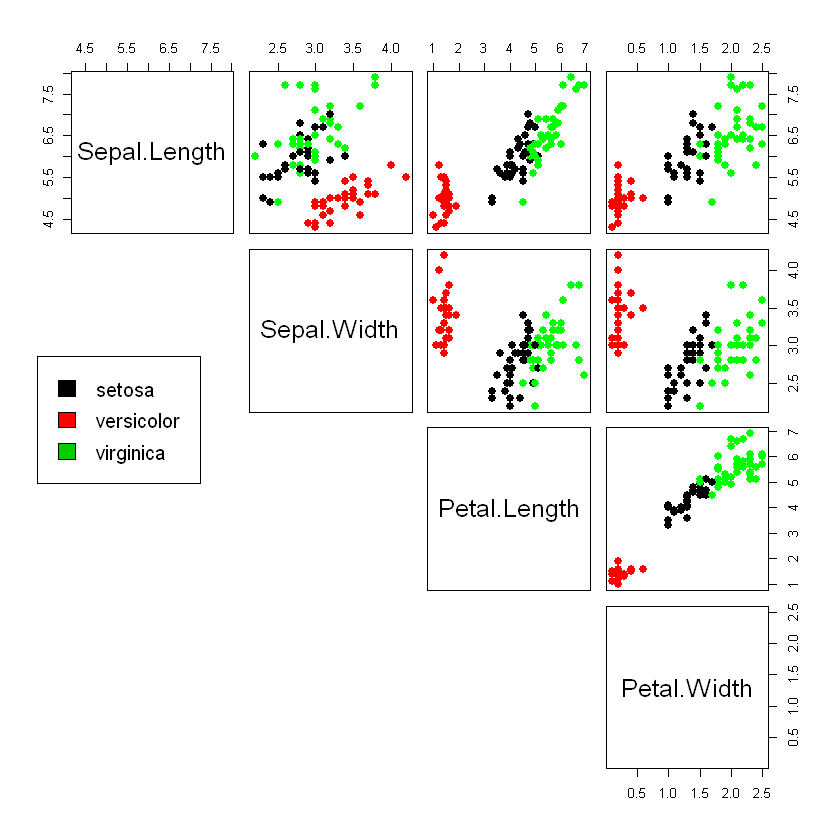

In [18]:
#Definición de colores para lagráfica
colores <- c("red", "black", "green")
#Crea gráfica 
pairs(train[,1:4], pch = 20,  cex = 2,col = colores[train$Species]
      ,lower.panel=NULL)
#Comando para introducir etiquetas en la gráfica
par(xpd = TRUE)
#Estructura de las etiquetas
legend("left", fill = unique(train$Species), 
       legend = c( levels(train$Species)))

Así, vemos que quizá más conveniente establecer las siguientes categorías:
1. setosa=0
2. versicolor=1
3. virginica=2

Veremos ahora las categorías que hace por default R

In [19]:
train$Species

[1] setosa     versicolor versicolor virginica  setosa     versicolor
  [7] virginica  setosa     versicolor virginica  versicolor virginica 
 [13] virginica  versicolor versicolor virginica  versicolor setosa    
 [19] setosa     setosa     versicolor setosa     setosa     setosa    
 [25] versicolor versicolor virginica  virginica  virginica  virginica 
 [31] virginica  virginica  virginica  setosa     virginica  versicolor
 [37] virginica  setosa     setosa     versicolor versicolor virginica 
 [43] versicolor setosa     versicolor setosa     versicolor virginica 
 [49] virginica  virginica  versicolor versicolor versicolor virginica 
 [55] setosa     setosa     versicolor virginica  setosa     versicolor
 [61] virginica  virginica  setosa     setosa     virginica  setosa    
 [67] versicolor virginica  virginica  virginica  setosa     versicolor
 [73] versicolor setosa     virginica  versicolor versicolor virginica 
 [79] virginica  versicolor setosa     setosa     virginica  setosa    
 [85] setosa     virginica  virginica  versicolor virginica  setosa    
 [91] virginica  versicolor versicolor setosa     virginica  virginica 
 [97] setosa     versicolor setosa     versicolor virginica  setosa    
[103] setosa     setosa     versicolor
Levels: setosa versicolor virginica

Ahora las volveremos numéricas haciendo énfasis en el órden que importa

In [20]:
#Generar valores por niveles
y_train<-factor(train$Species,levels=c('setosa',
        'versicolor', 'virginica'),ordered = TRUE)
#Transformar niveles en formato numérico
y_train<-as.numeric(y_train)
#Visualizamos los valores
y_train

[1] 1 2 2 3 1 2 3 1 2 3 2 3 3 2 2 3 2 1 1 1 2 1 1 1 2 2 3 3 3 3 3 3 3 1 3 2 3
 [38] 1 1 2 2 3 2 1 2 1 2 3 3 3 2 2 2 3 1 1 2 3 1 2 3 3 1 1 3 1 2 3 3 3 1 2 2 1
 [75] 3 2 2 3 3 2 1 1 3 1 1 3 3 2 3 1 3 2 2 1 3 3 1 2 1 2 3 1 1 1 2

Cambiamos un poco su estructura para que sea como deseamos

In [21]:
y_train<-y_train-1
y_train

[1] 0 1 1 2 0 1 2 0 1 2 1 2 2 1 1 2 1 0 0 0 1 0 0 0 1 1 2 2 2 2 2 2 2 0 2 1 2
 [38] 0 0 1 1 2 1 0 1 0 1 2 2 2 1 1 1 2 0 0 1 2 0 1 2 2 0 0 2 0 1 2 2 2 0 1 1 0
 [75] 2 1 1 2 2 1 0 0 2 0 0 2 2 1 2 0 2 1 1 0 2 2 0 1 0 1 2 0 0 0 1

### ¿Cuál será el peor método de clasificación posible?

Se genera el método de clasificación aleatorio

In [22]:
y_predict<-sample(c(0,1,2),size=train_size,replace=TRUE)
y_predict

[1] 1 2 2 0 2 2 0 2 2 0 1 0 0 2 2 2 1 2 2 0 0 1 2 1 1 1 1 0 0 1 0 0 0 0 2 2 1
 [38] 0 2 1 1 1 2 2 0 0 0 1 0 1 1 1 2 2 0 1 0 0 2 1 2 1 1 2 0 0 0 1 2 0 2 0 0 0
 [75] 1 2 2 1 1 0 2 2 2 1 0 0 0 2 1 2 2 0 2 0 1 0 2 1 2 0 2 2 2 0 0

### ¿Cómo medimos la efectividad de un modelo de ML?

### Accuracy

Cantidad de aciertos, entre total de predicciones

$Accuracy=\dfrac{Aciertos}{Total}$

Usando la librería MLmetrics

In [23]:
#install.packages('MLmetrics')
library("MLmetrics")


Attaching package: 'MLmetrics'

The following object is masked from 'package:base':

    Recall



In [24]:
Accuracy(y_predict,y_train)

[1] 0.2666667

### Mean Squared Error (MSE)
Suma del promedio de los errores al cuadrado

$MSE=\dfrac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{y_{i}})^2$

Modo fácil

In [25]:
MSE(y_predict,y_train)

[1] 1.704762

## ¿Tiene sentido tratar de verificar este pésimo clasificador en una base de validación?